In [12]:
import pandas as pd
import matplotlib.pyplot as plt

CPU = "Intel Core i7-1065G7"

In [39]:
df = pd.read_csv("experiments/test-run-2/training_logs.csv")
df

EmptyDataError: No columns to parse from file

In [5]:
df_train = df.query("Phase == 'training'")
df_train

,Iteration,Phase,Mean Loss,Speed Error,Gear Accuracy
0,0,training,5.786410,277.752044,0.0000
1,1,training,5.565053,271.688599,0.3125
2,2,training,5.762186,277.873790,0.0000
3,3,training,6.055247,295.707388,0.1875
4,4,training,6.255801,305.660956,0.1250
...,...,...,...,...,...
83304,83221,training,1.676585,14.499953,0.1875
83305,83222,training,1.617973,18.679563,0.5000
83306,83223,training,1.690429,18.405012,0.0625
83307,83224,training,1.633522,16.205537,0.3750


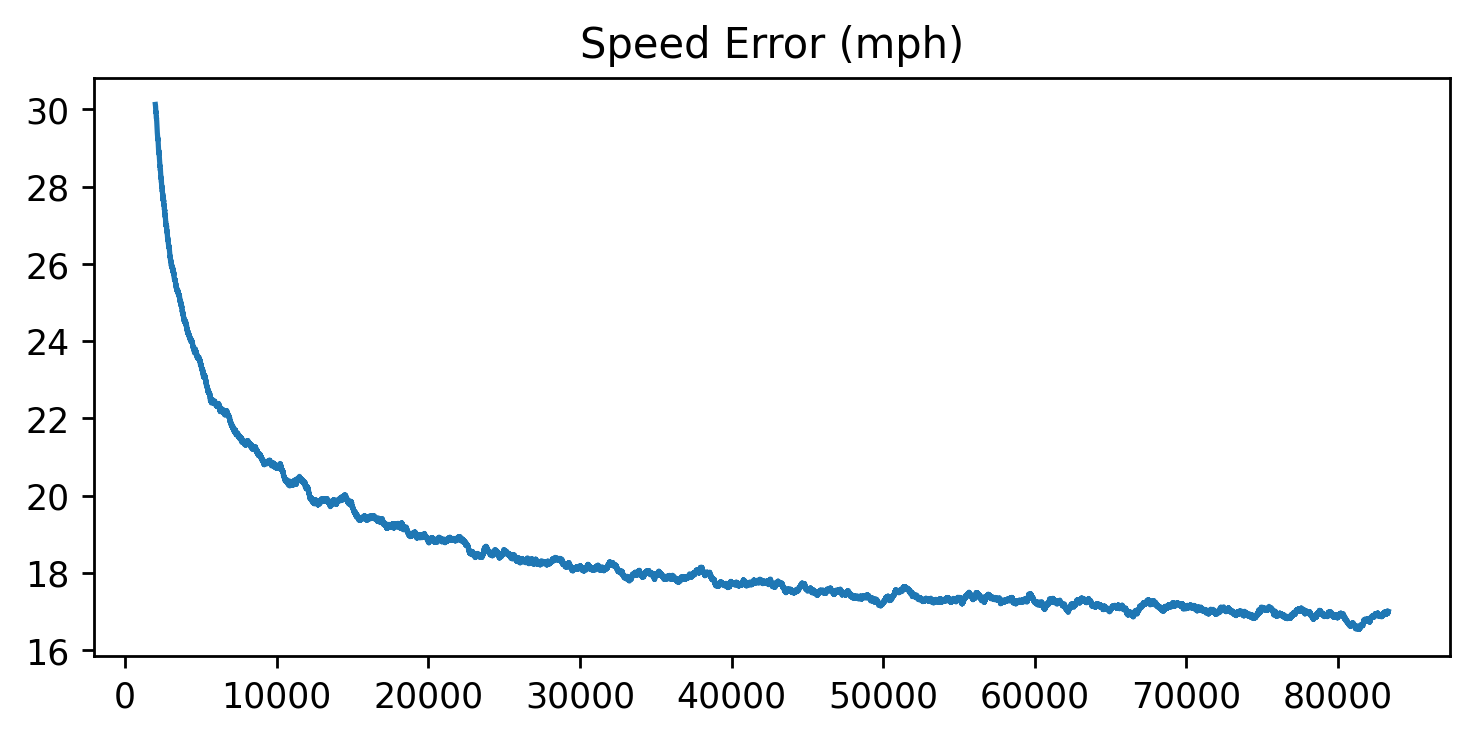

In [24]:
speeds = df_train['Speed Error'].rolling(1000).mean()
speeds = speeds[speeds.notna()]
plt.figure(dpi=250, figsize=(7, 3))
plt.title("Speed Error (mph)")
plt.plot(speeds[1000:])
plt.show()

C:\Users\furka\AppData\Local\Temp\ipykernel_25904\4092270401.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([f'{x:.0%}' for x in plt.gca().get_yticks()])


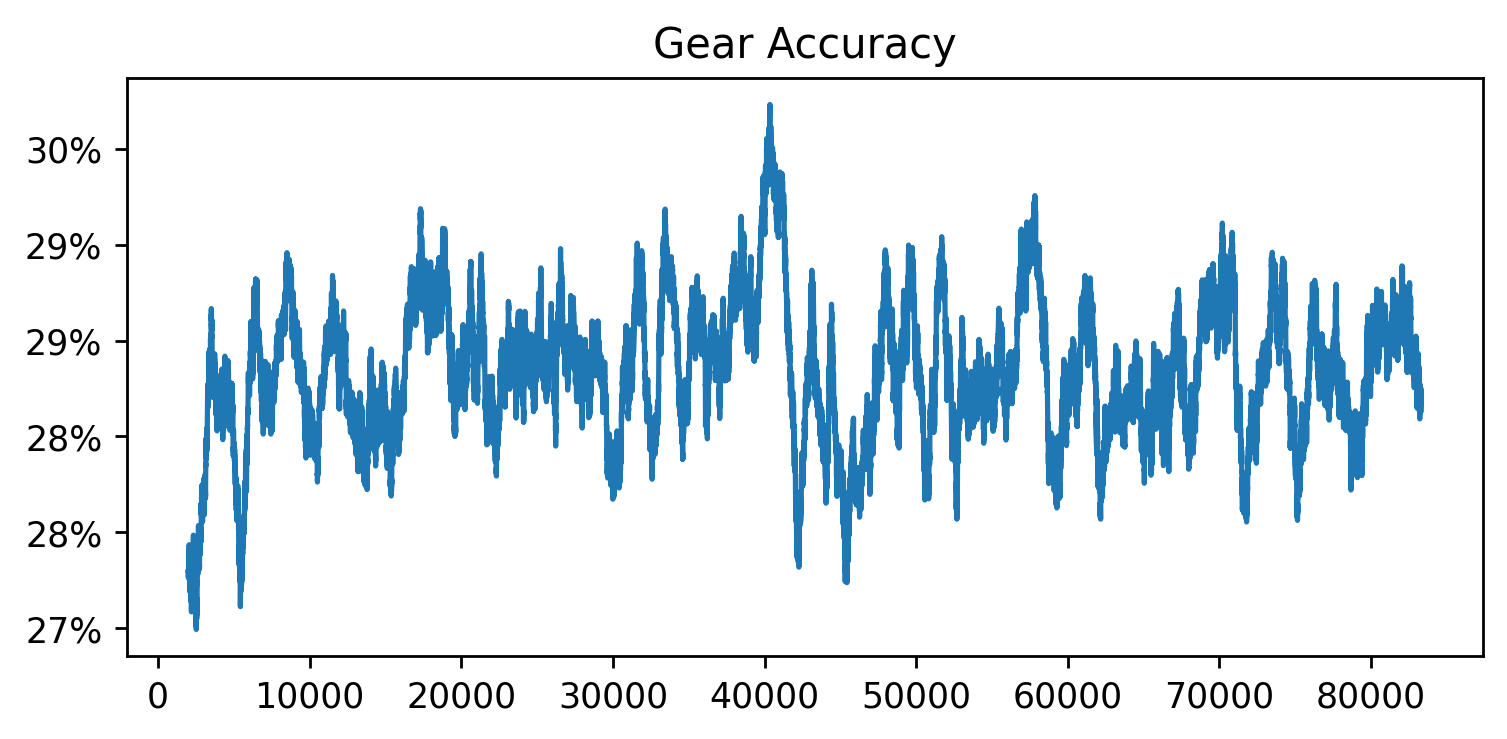

In [36]:
gears = df_train['Gear Accuracy'].rolling(1000).mean()
gears = gears[gears.notna()]
plt.figure(dpi=250, figsize=(7, 3))
plt.title("Gear Accuracy")
plt.plot(gears[1000:])
plt.gca().set_yticklabels([f'{x:.0%}' for x in plt.gca().get_yticks()])
plt.show()

Data Points: 167


C:\Users\furka\AppData\Local\Temp\ipykernel_25904\2528924996.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([f'{x:.0%}' for x in plt.gca().get_yticks()])
C:\Users\furka\AppData\Local\Temp\ipykernel_25904\2528924996.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels([f'{x:.0f}mph' for x in plt.gca().get_xticks()])


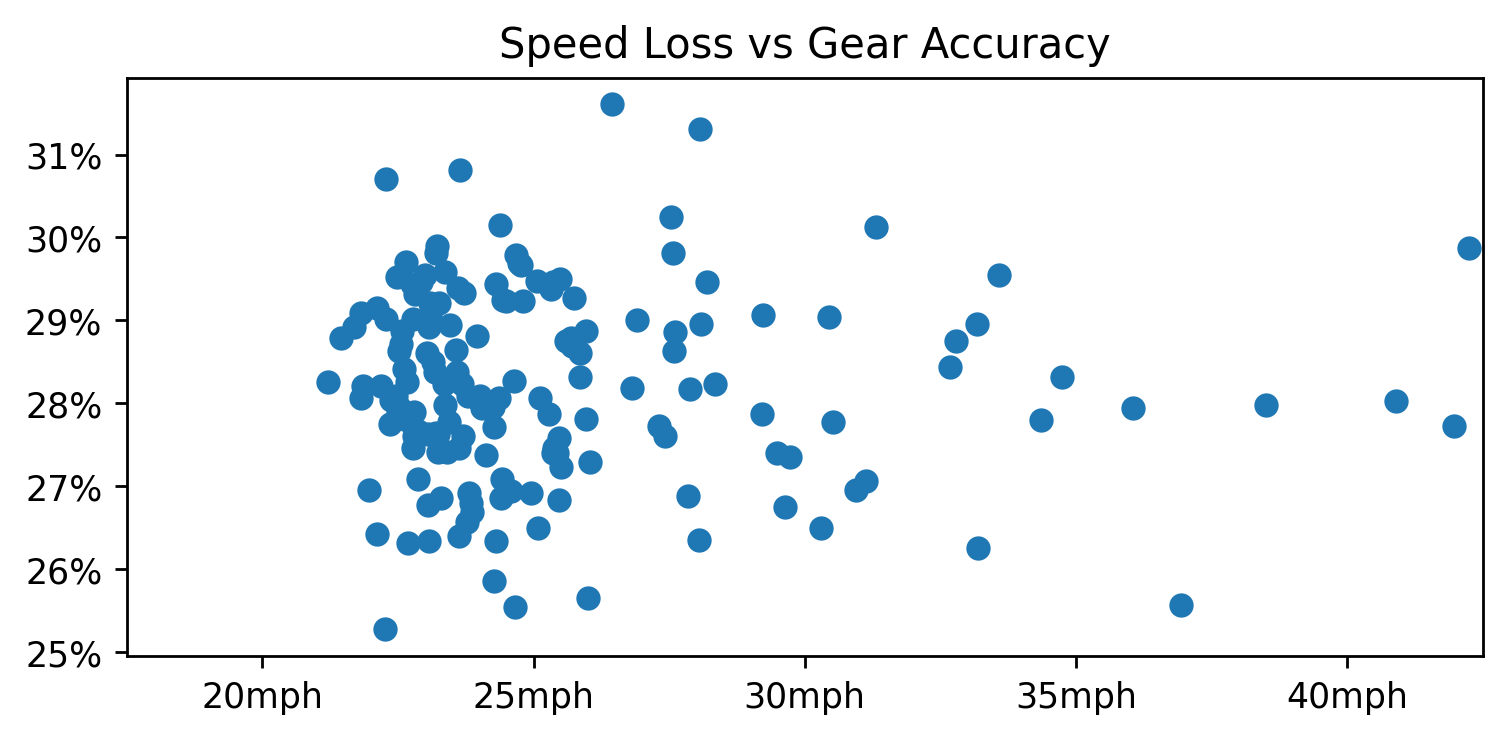

In [34]:
plt.figure(dpi=250, figsize=(7, 3))
plt.title("Speed Loss vs Gear Accuracy")
x = df['Speed Error'].rolling(100).mean()[::500]
y = df['Gear Accuracy'].rolling(100).mean()[::500]
print("Data Points:", x.shape[0])
ax = plt.scatter(x, y)
plt.gca().set_yticklabels([f'{x:.0%}' for x in plt.gca().get_yticks()])
plt.gca().set_xticklabels([f'{x:.0f}mph' for x in plt.gca().get_xticks()])
plt.xlim(15, 25)
plt.show()